# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
#HEj

import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})



# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel

# Question 1

**Explain how you solve the model**

In [ ]:
# code for solving the model (remember documentation and comments)

from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

print(model.par.alpha)
print(model.par.sigma)

model.solve_discrete()
print(model.solve_discrete())



#Test = HouseholdSpecializationModelClass() 

#for alpha in (0.25, 0.50, 0.75):
 #   Test.par.alpha = alpha
  #  Test.solve_discrete()
   # print(Test.solve_discrete())
    


#for sigma in (0, 0.5, 1.0):
#    model.par.sigma = sigma
#    model.solve_discrete()
#    print(model.solve_discrete())

#Question 1

list_alphas = [ 0.25, 0.5, 0.75]
list_sigmas = [ 0.5, 1.0, 1.5]
results_ratio = {}

#Solving
for sigma in list_sigmas:
    model.par.sigma = sigma
    for alpha in list_alphas:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        relative_hours = opt.HF/opt.HM
        results_ratio[(alpha, sigma)] = opt.HF/opt.HM

        print(f' Sigma = {model.par.sigma:.2f} Alpha = {model.par.alpha:.2f}    Ratio: {relative_hours:.2f}')



#Plotting
fig, ax = plt.subplots()
for sigma in list_sigmas:
    y = [results_ratio[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f"Sigma={sigma}")
ax.set_xlabel("Alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()




# Question 2

Explain your code and procedure

[2.07944154 1.60943791 1.54044504 1.54044504 1.46633707]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


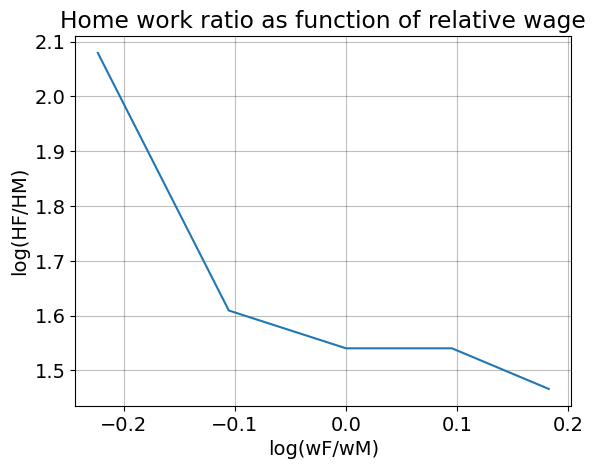

In [56]:
# Question 2

results_workratio = np.empty(5)
results_wageratio = np.empty(5)

list_wF = [0.8, 0.9, 1.0, 1.1, 1.2]

for i, wF in enumerate(list_wF):
    model.par.wF = wF
    opt = model.solve_discrete()
    results_workratio[i] = np.log(opt.HF/opt.HM)
    results_wageratio[i] = np.log(model.par.wF/model.par.wM)

print(results_workratio)
print(results_wageratio)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_wageratio, results_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');




# Question 3

Explain your code and procedure

In [101]:
# code


model.solve()


     fun: 100000000.288
     jac: array([ 0.00000000e+00, -6.71088546e+15,  0.00000000e+00,  0.00000000e+00])
 message: 'Inequality constraints incompatible'
    nfev: 10
     nit: 2
    njev: 2
  status: 4
 success: False
       x: array([4.88801707e-14, 0.00000000e+00, 1.20000000e+01, 1.20000000e+01])

ADD CONCISE CONLUSION.